In [1]:
#Import relevant libraries & modules 
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import matplotlib.pyplot as plt
import pickle
import glob 
import sys
import os
%matplotlib inline

sys.path.insert(0,'/Users/abose/Desktop/GitHub/Python-for-Data-Analysis/Text-Analytics/')
import PreProcessor
import Modeler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [92]:
#Importlib (incase module is updated)
importlib.reload(PreProcessor)

<module 'PreProcessor' from '/Users/abose/Desktop/GitHub/Python-for-Data-Analysis/Text-Analytics/PreProcessor.py'>

In [102]:
#Quick-load pickled data
with open('data_clean.p', 'rb') as handle:
    data_clean = pickle.load(handle)

In [95]:
#Load raw-data and explore if any missing vals.
data_raw = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', low_memory=False)
data_raw = PreProcessor.rename_cols(data_raw)
missing_raw = PreProcessor.missingSummary(data_raw)
missing_raw #No missing values 

,Total,Remaining,Percent


In [96]:
list(data_clean.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition_indicator',
 'Age_binned',
 'Distance_binned',
 'Monthly_income_binned',
 'Year_at_company_binned',
 'Percent_hike_binned',
 'Years_since_last_promotion_binned',
 'Years_w_current_mgr_binned']

In [97]:
data_clean['RelationshipSatisfaction'].describe()

count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

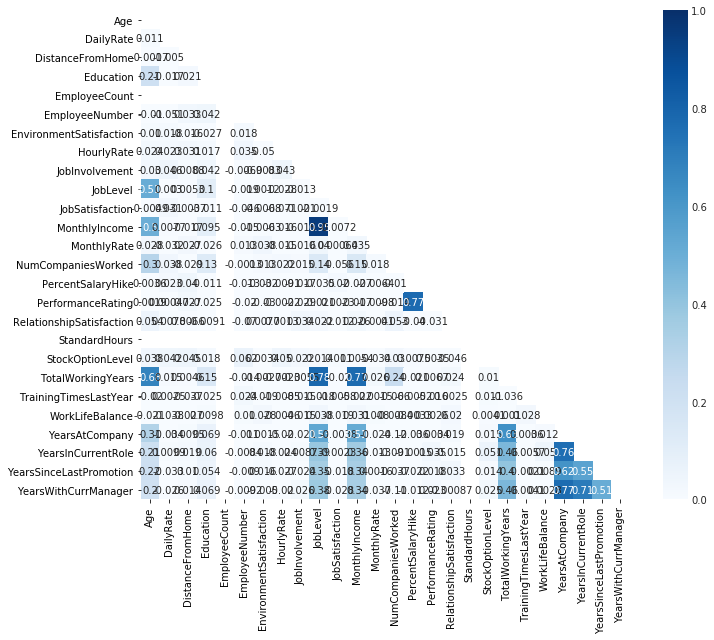

In [98]:
#Heatmap to access multicollinearity
PreProcessor.heatmap(data_raw)

In [99]:
#Data manipluation - binning relevant fields / categorizing continous data

#change outcome variable to 1/0
data_raw['Attrition_indicator'] = data_raw.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

#change rating variables to NPS Categories
rating_cols = list(['EnvironmentSatisfaction', 'JobSatisfaction','RelationshipSatisfaction'])
data_raw = PreProcessor.pr_categorize(data_raw, rating_cols)

#change continous variables into binned categories
data_raw['Age_binned'] = pd.cut(data_raw['Age'], [18, 20, 30, 40, 50, 60], labels = ['below_20', '20-30', '30-40', '40-50', '50-60'])
data_raw['Distance_binned'] = pd.cut(data_raw['DistanceFromHome'], [0, 5, 10, 15, 20, 40], labels = ['0-5', '5-10', '10-15', '15-20', '20+'])
data_raw['Monthly_income_binned'] = pd.cut(data_raw['MonthlyIncome'], [1000, 5000, 10000, 15000, 20000], labels = ['1K-5K', '5K-10K', '10K-15K','15K-20K'])
data_raw['Year_at_company_binned'] = pd.cut(data_raw['YearsAtCompany'], [0, 5, 10, 15, 20, 25, 30, 35, 40], labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40'])
data_raw['Percent_hike_binned'] = pd.cut(data_raw['PercentSalaryHike'], [10, 15, 20, 25], labels = ['10-15', '15-20', '20-25'])
data_raw['Years_since_last_promotion_binned'] = pd.cut(data_raw['YearsSinceLastPromotion'], [0, 5, 10, 15], labels = ['less_than_5', '5-10', '10-15'])
data_raw['Years_w_current_mgr_binned'] = pd.cut(data_raw['YearsWithCurrManager'], [0, 2, 3, 7, 10, 17], labels = ['less_than_2', '2-3', '3-7', '7-10', '10+'])

All features have been categorized


In [100]:
#Drop irrelvant cols
cols_to_drop = ['DailyRate','EmployeeCount', 'EmployeeNumber','HourlyRate','MonthlyRate', 'Over18','TotalWorkingYears']
data_raw.drop(cols_to_drop, axis=1, inplace=True)

In [101]:
#Save data as pickle
pickle.dump(data_raw, open('data_clean.p', 'wb'))

# Part-2: Exploring Relationships

## 2a: Univariate Relationships:
1. Distribution of Churn by Age
2. Distribution of Churn by Distance
3. Distribution of Churn by Monthly_Income
4. Distribution of Churn by Years_at_company
5. Distribution of Churn by Percent_hike
6. Distribution of Churn by Years_since_Promotion
7. Distribution of Churn by Ratings

In [103]:
#Explore: Distribution of churn by age
table_age_churn = pd.pivot_table(data_clean, values=['EnvironmentSatisfaction'], index='Attrition_indicator', columns=['Age_binned'], aggfunc='count', margins=True)
table_age_churn_percent = round(table_age_churn.div(table_age_churn.iloc[:,-1], axis=0),2)
Modeler.data_to_excel(table_age_churn_percent, 'Results_table_age_churn.xlsx')

In [104]:
#Explore: Distribution of churn by Distance
table_dist_churn = pd.pivot_table(data_clean, values=['EnvironmentSatisfaction'], index='Attrition_indicator', columns=['Distance_binned'], aggfunc='count', margins=True)
table_dist_churn_percent = round(table_dist_churn.div(table_dist_churn.iloc[:,-1], axis=0),2)
Modeler.data_to_excel(table_dist_churn_percent, 'Results_table_dist_churn.xlsx')

In [105]:
#Explore: Distribution of churn by Monthly_income
table_monthlyinc_churn = pd.pivot_table(data_clean, values=['EnvironmentSatisfaction'], index='Attrition_indicator', columns=['Monthly_income_binned'], aggfunc='count', margins=True)
table_monthlyinc_churn_percent = round(table_monthlyinc_churn.div(table_monthlyinc_churn.iloc[:,-1], axis=0),2)
Modeler.data_to_excel(table_monthlyinc_churn_percent, 'Results_table_montlyinc_churn.xlsx')

In [106]:
#Explore: Distribution of churn by Years_at_company
table_yearsatcompany_churn = pd.pivot_table(data_clean, values=['EnvironmentSatisfaction'], index='Attrition_indicator', columns=['Year_at_company_binned'], aggfunc='count', margins=True)
table_yearsatcompany_churn_percent = round(table_yearsatcompany_churn.div(table_yearsatcompany_churn.iloc[:,-1], axis=0),2)
Modeler.data_to_excel(table_yearsatcompany_churn_percent, 'Results_table_yearsatcompany_churn.xlsx')

In [107]:
#Explore: Distribution of churn by Percent_hike
table_percenthike_churn = pd.pivot_table(data_clean, values=['EnvironmentSatisfaction'], index='Attrition_indicator', columns=['Percent_hike_binned'], aggfunc='count', margins=True)
table_percenthike_churn_percent = round(table_percenthike_churn.div(table_percenthike_churn.iloc[:,-1], axis=0),2)
Modeler.data_to_excel(table_percenthike_churn_percent, 'Results_tablean_percenthike_churn.xlsx')

In [108]:
#Explore: Distribution of churn by Years_since_promotion
table_yearssincepromotion_churn = pd.pivot_table(data_clean, values=['EnvironmentSatisfaction'], index='Attrition_indicator', columns=['Years_since_last_promotion_binned'], aggfunc='count', margins=True)
table_yearssincepromotion_churn_percent = round(table_yearssincepromotion_churn.div(table_yearssincepromotion_churn.iloc[:,-1], axis=0),2)
Modeler.data_to_excel(table_yearssincepromotion_churn_percent, 'Results_table_yearssincepromotion_churn.xlsx')

In [177]:
#Explore: Distribution of churn by Satisfaction Ratings
rating_cols_categorized = list(['EnvironmentSatisfaction_CAT', 'JobSatisfaction_CAT', 'RelationshipSatisfaction_CAT'])
table_ = pd.DataFrame(pd.get_dummies(data_clean[rating_cols_categorized]).sum())
table_satisfaction_ratings_churn = round(data_clean.groupby('Attrition_indicator')[rating_cols].mean(),2)
Modeler.t_test_table(table_satisfaction_ratings_churn, data_clean, 'Attrition_indicator')
table_satisfaction_ratings_churn

Non-Sig differences in: | RelationshipSatisfaction


,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
Attrition_indicator,,,
0,2.77,2.78,2.73
1,2.46,2.47,2.60


### 2a: Plotting Univariate Relationships

Text(0.5,1,'Distribution of Attrition by Age')

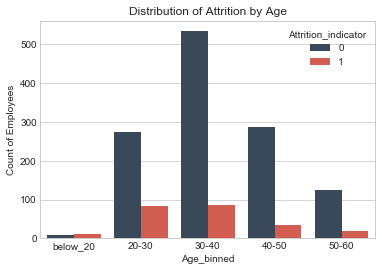

In [146]:
#Distribution of Churn by Age
    #Most churn are in the 20-40 range. 20-30 group has a disproportionately larger churn
sns.set_style("whitegrid")
flatui = ["#34495e", "#e74c3c"]
ax = sns.countplot(x="Age_binned", hue="Attrition_indicator", data=data_clean, palette=flatui)
ax.set_ylabel('Count of Employees')
ax.set_title('Distribution of Attrition by Age')

Text(0.5,1,'Distribution of Attrition by Tenure')

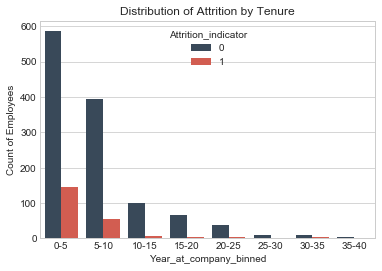

In [151]:
#Distribution of Churn by Tenure
    #Churn significantly decreases with tenure. But majority of churn is in the 0-5 year range. Need to look into "On-boarding" years to further narrow down why
sns.set_style("whitegrid")
flatui = ["#34495e", "#e74c3c"]
ax = sns.countplot(x="Year_at_company_binned", hue="Attrition_indicator", data=data_clean, palette=flatui)
ax.set_ylabel('Count of Employees')
ax.set_title('Distribution of Attrition by Tenure')

Text(0.5,1,'Distribution of Attrition by Distance from work')

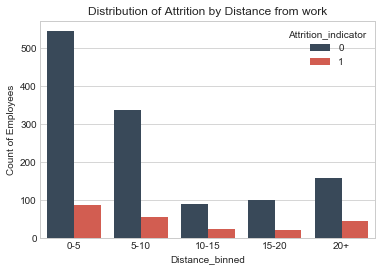

In [141]:
#Distribution of Churn by Distance
    #Distance from work really doesn't have much to do with churn. People living farther / closer churn roughtly at similar rates
sns.set_style("whitegrid")
ax = sns.countplot(x="Distance_binned", hue="Attrition_indicator", data=data_clean, palette=flatui)
ax.set_ylabel('Count of Employees')
ax.set_title('Distribution of Attrition by Distance from work')

Text(0.5,1,'Distribution of Attrition by Monthly Income Range')

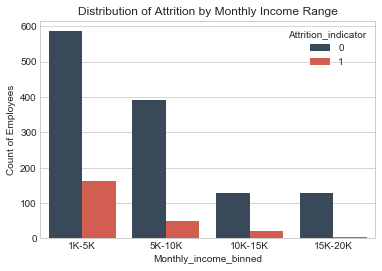

In [147]:
#Distribution of Churn by Monthly Income
    #Churn is disproportionately higher for lower income bins (1K-5K)
sns.set_style("whitegrid")
ax = sns.countplot(x="Monthly_income_binned", hue="Attrition_indicator", data=data_clean, palette=flatui)
ax.set_ylabel('Count of Employees')
ax.set_title('Distribution of Attrition by Monthly Income Range')

Text(0.5,1,'Distribution of Attrition by Years since last promotion')

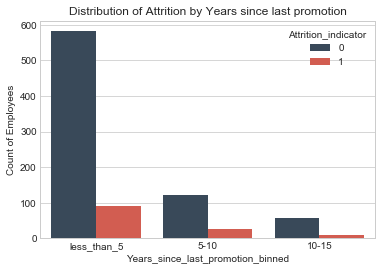

In [148]:
#Distribution of Churn by Years since last promotion
    #Most churn is in the newly promoted category - suggesting that its not the promotion but the expectation of promotion
sns.set_style("whitegrid")
ax = sns.countplot(x="Years_since_last_promotion_binned", hue="Attrition_indicator", data=data_clean, palette=flatui)
ax.set_ylabel('Count of Employees')
ax.set_title('Distribution of Attrition by Years since last promotion')

Text(0.5,1,'Distribution of Attrition by Years since last promotion')

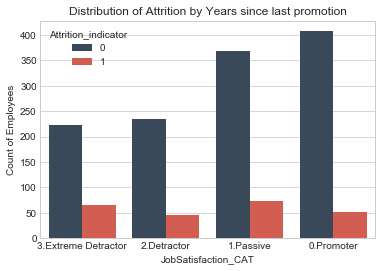

In [230]:
#Distribution of Churn by JobSatisfaction_Category
    #Churn numbers do not change for differnt job satisfaction categories
sns.set_style("whitegrid")
ax = sns.countplot(x="JobSatisfaction_CAT", hue="Attrition_indicator", data=data_clean, palette=flatui, order=["3.Extreme Detractor", "2.Detractor", "1.Passive", "0.Promoter"])
ax.set_ylabel('Count of Employees')
ax.set_title('Distribution of Attrition by Years since last promotion')

Text(0.5,1,'Average Satisfaction Ratings by group')

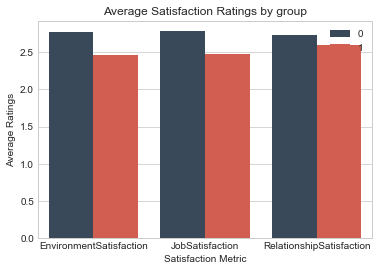

In [227]:
#Distribution of Average Satisfaction Ratings
    #0.5 std difference in groups but no statistically significant difference in Relationship Satsifaction
table_satisfaction_ratings_churn.melt()
table_satisfaction_ratings_plot = pd.concat([table_satisfaction_ratings_churn.melt(), pd.DataFrame([0,1,0,1,0,1], columns=['Attrition_indicator'])], axis=1)
sns.set_style("whitegrid")
ax = sns.barplot(x="variable", y="value", hue="Attrition_indicator", data=table_satisfaction_ratings_plot, palette=flatui)
ax.set_ylabel('Average Ratings')
ax.set_xlabel('Satisfaction Metric')
plt.legend(loc='best')
ax.set_title('Average Satisfaction Ratings by group')